%matplotlib inline

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [135]:
cx = "0004244157511163772131:swmjc3vgy_a"
url = "https://www.googleapis.com/customsearch/v1?"

total_results = []
months = []

In [ ]:
# Running our JSON requests

page2 = requests.request("GET", url, params=parameters2)
for x in range(1, 105, 1):
    print(x)
    timeperiod1 = 'w' + str(x)
    parameters1 = {"q": "moth lamp meme",
              "cx": cx,
              "key": gkey,
              "dateRestrict": timeperiod1
              }
    timeperiod2 = 'w' + str(x+1)
    parameters2 = {"q": "moth lamp meme",
              "cx": cx,
              "key": gkey,
              "dateRestrict": timeperiod2
              }
    
    page1 = requests.request("GET", url, params=parameters1)
    page2 = requests.request("GET", url, params=parameters2)

    
    results1 = json.loads(page1.text)
    results2 = json.loads(page2.text)

    
    #print(results)
    hits1 = results1["searchInformation"]["totalResults"]
    hits1 = int(hits1)
    hits2 = results2["searchInformation"]["totalResults"]
    hits2 = int(hits2)

    
    #print(hits)
    hits_permon = (hits2 - hits1) +hits1
    total_results.append(hits_permon)
    months.append("w" + str(x))

In [136]:
# IMPORTING ALL OUR CSV
covfefe_csv = "cofefe_104weeks_file.csv"
send_nudes_csv = "sendnudes_104weeks_file.csv"
tide_pods_csv = "tide_pod_meme_overall_file_w104.csv"
walmart_csv = "yodelling walmart boy_104weeks_file.csv"
expanding_brain = "expanding_brain_meme_overall_file_w104.csv"

In [137]:
# GROUP ONE
covfefe_df = pd.read_csv(covfefe_csv)
send_nudes_df = pd.read_csv(send_nudes_csv)

# GROUP TWO
tide_pods_df = pd.read_csv(tide_pods_csv)
walmart_df = pd.read_csv(walmart_csv)

expanding_brain_df = pd.read_csv(expanding_brain)

In [138]:
# MANY MERGES TO MERGE
group_one = pd.merge(covfefe_df, send_nudes_df, how="outer", on="Months") 

#Renaming the Moth Results
group_one = group_one.rename(columns={"Results_x": "Covfefe"})
group_one = group_one.rename(columns={"Results_y": "Send Nudes"})

# group_three = pd.merge(expanding_brain,
group_one.head()

,Months,Covfefe,Send Nudes
0,w1,8690,6210000
1,w2,11200,9540000
2,w3,14600,13500000
3,w4,16100,12700000
4,w5,17800,20200000


In [139]:
group_two = pd.merge(tide_pods_df, walmart_df, how="outer", on="Months")

group_two.head()

,Months,Results_x,Results_y
0,w2,15600.0,932
1,w3,19600.0,1120
2,w4,23900.0,1180
3,w5,26700.0,1320
4,w6,31100.0,1450


In [140]:
group_merge = pd.merge(group_one, group_two, how="outer", on="Months")
group_merge.head()

,Months,Covfefe,Send Nudes,Results_x,Results_y
0,w1,8690,6210000,NaN,768
1,w2,11200,9540000,15600.0,932
2,w3,14600,13500000,19600.0,1120
3,w4,16100,12700000,23900.0,1180
4,w5,17800,20200000,26700.0,1320


In [150]:
# ALL COMBINED CSVS IN ONE DATA FRAME
recent_memes = pd.merge(group_merge, expanding_brain_df, how="outer", on="Months")

# Renaming the Moth Results
recent_memes = recent_memes.rename(columns={"Results_x":"Tide Pods","Results_y":"Yodeling Walmart Boy","Results":"Expanding Brain"})

recent_memes.head()

,Months,Covfefe,Send Nudes,Tide Pods,Yodeling Walmart Boy,Expanding Brain
0,w1,8690,6210000,NaN,768,NaN
1,w2,11200,9540000,15600.0,932,26700.0
2,w3,14600,13500000,19600.0,1120,36300.0
3,w4,16100,12700000,23900.0,1180,42500.0
4,w5,17800,20200000,26700.0,1320,42700.0


<function matplotlib.pyplot.show(*args, **kw)>

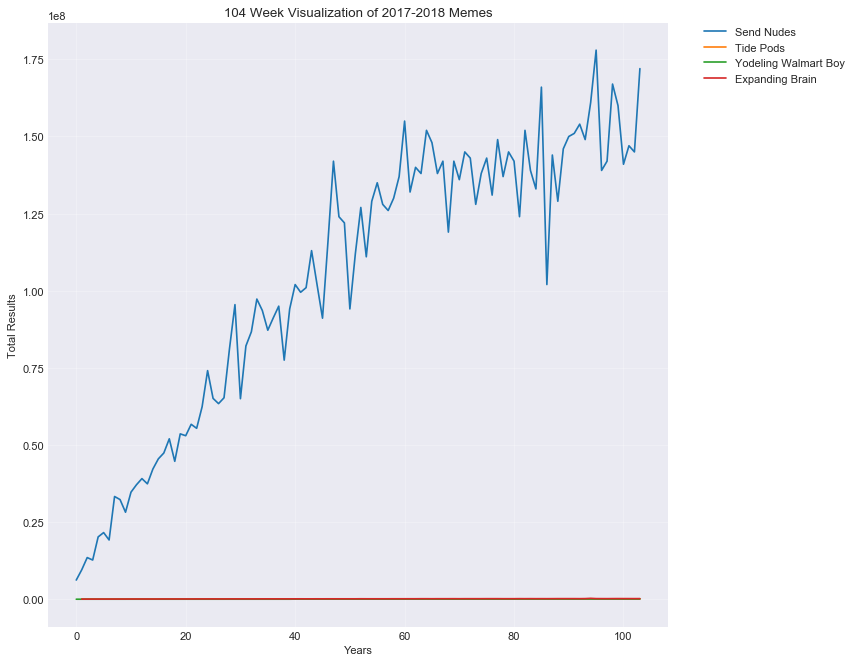

In [155]:
# This shows that "Send Nudes" crushed all the other memes in popularity
# even tho they were all quite popular

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(recent_memes["Send Nudes"])
plt.plot(recent_memes["Tide Pods"])
plt.plot(recent_memes["Yodeling Walmart Boy"])
plt.plot(recent_memes["Expanding Brain"])


plt.title("104 Week Visualization of 2017-2018 Memes")
plt.xlabel("Years")
plt.ylabel("Total Results")
plt.grid(alpha = 0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

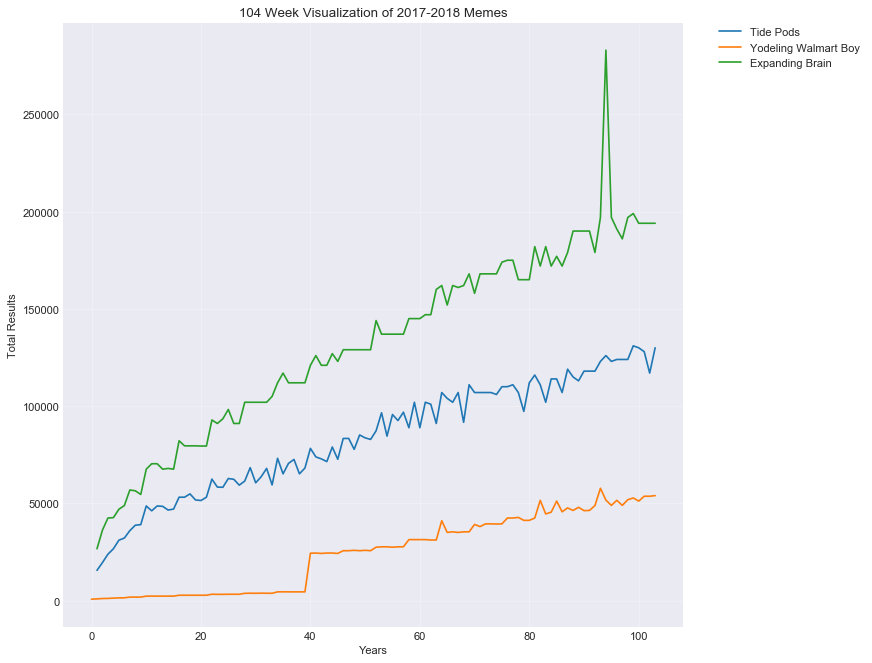

In [156]:
# After commenting out "Send Nudes" the other data was able to chart

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

#plt.plot(recent_memes["Send Nudes"])
plt.plot(recent_memes["Tide Pods"])
plt.plot(recent_memes["Yodeling Walmart Boy"])
plt.plot(recent_memes["Expanding Brain"])


plt.title("104 Week Visualization of 2017-2018 Memes")
plt.xlabel("Years")
plt.ylabel("Total Results")
plt.grid(alpha = 0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show